# Tp Indexation

In [1]:
#importation des bib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, InputLayer,Reshape,Conv2D,MaxPooling2D,Dense, Flatten
from tensorflow.keras.layers import Dense, Dropout, Activation 
nb_classes=10


In [2]:
#Charger les données de « MNIST »
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Taille de:")
print("- Ensemble d'apprentissage:",format(X_train.shape))
print("- Ensemble de test:",format(X_test.shape))

Taille de:
- Ensemble d'apprentissage: (60000, 28, 28)
- Ensemble de test: (10000, 28, 28)


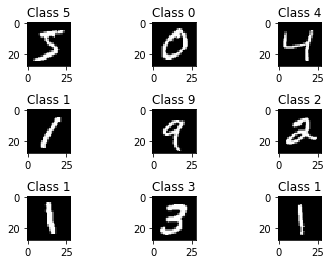

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray',interpolation='none')
    plt.subplots_adjust(hspace=1,wspace=0.5)
    plt.title("Class {}".format(y_train[i]))

In [4]:
# Prétraitement des données
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print(y_test[1])
print(Y_test[1])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
img_shape_full = (28, 28, 1)
# Commencer la construction du modèle séquentiel de Keras.
model=Sequential()
# Ajouter une couche d'entrée qui doit être un tuple contenant la taille de l'image. 
model.add(InputLayer (input_shape=(784,)))
# L'entrée est un vecteur de 784 éléments,
# mais les couches convolutionnelles attendent des images avec forme (28, 28, 1)
model.add(Reshape(img_shape_full))
# Première couche convolutionnelle avec activation ReLU et max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))
# Deuxième couche convolutionnelle avec activation ReLU et max-pooling.
model.add(Conv2D (kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
#fully-connected / dense layer avec ReLU.
model.add(Dense (128, activation='relu'))
# derniére fully-connected / dense avec softmax-activation pour la classification model.add(Dense (nb_classes, activation='softmax'))
model.add(Dense (nb_classes, activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 layer_conv1 (Conv2D)        (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 layer_conv2 (Conv2D)        (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1764)              0

In [6]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train, Y_train,batch_size=128, epochs=10,verbose=1)

Epoch 1/10
469/469 [==============================] - 33s 68ms/step - loss: 0.2149 - accuracy: 0.9372
Epoch 2/10
469/469 [==============================] - 32s 67ms/step - loss: 0.0589 - accuracy: 0.9818
Epoch 3/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0408 - accuracy: 0.9869
Epoch 4/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0314 - accuracy: 0.9903
Epoch 5/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0245 - accuracy: 0.9919
Epoch 6/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 7/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 8/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 10/10
469/469 [==============================] - 30s 63ms/step - loss: 0.010

In [7]:
score = model.evaluate(X_test, Y_test, verbose=1)

for name, value in zip(model.metrics_names, score):

    print(name, value)

313/313 [==============================] - 2s 5ms/step - loss: 0.0257 - accuracy: 0.9914
loss 0.02567627839744091
accuracy 0.9914000034332275


313/313 [==============================] - 2s 5ms/step


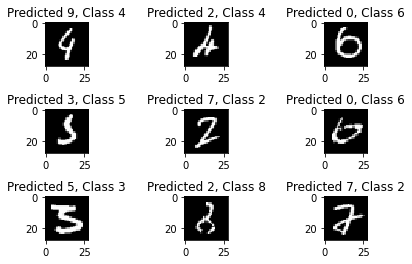

In [12]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray',
    interpolation='none')
    plt.subplots_adjust(hspace=1, wspace=1.5)

    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],
    y_test[incorrect]))

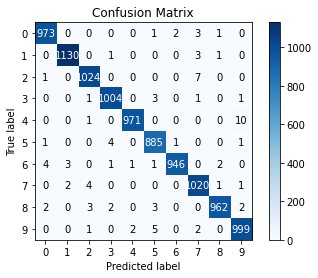

In [9]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, predicted_classes,normalize=False)

plt.show()

In [10]:
print (confusion_matrix(y_test, predicted_classes))

[[ 973    0    0    0    0    1    2    3    1    0]
 [   0 1130    0    1    0    0    0    3    1    0]
 [   1    0 1024    0    0    0    0    7    0    0]
 [   0    0    1 1004    0    3    0    1    0    1]
 [   0    0    1    0  971    0    0    0    0   10]
 [   1    0    0    4    0  885    1    0    0    1]
 [   4    3    0    1    1    1  946    0    2    0]
 [   0    2    4    0    0    0    0 1020    1    1]
 [   2    0    3    2    0    3    0    0  962    2]
 [   0    0    1    0    2    5    0    2    0  999]]


In [11]:
print (classification_report(y_test, predicted_classes,target_names=None))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

